0.0032054773702687722


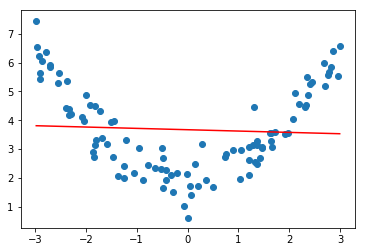

2.2349304358089386
0.17181430216920063


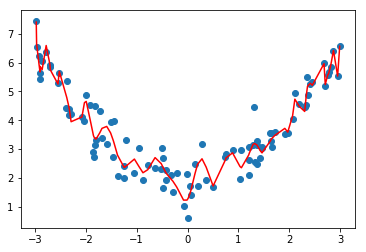

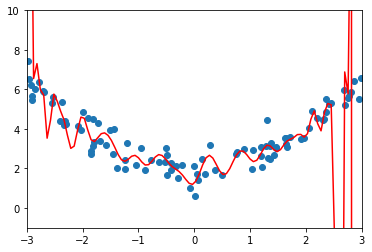

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + 0 + 2 + np.random.normal(0,0.5,size=100)

#使用线性回归
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))

y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

#使用均方误差衡量
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)
MSE = mean_squared_error(y,y_predict)
print(MSE)

#使用多项式回归
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
def PolynomialRegression(degree):
    return Pipeline([("poly",PolynomialFeatures(degree=degree)),("std_scaler",StandardScaler()),("lin_reg",LinearRegression())])
poly2_reg = PolynomialRegression(degree=100)
poly2_reg.fit(X,y)
y2_predict = poly2_reg.predict(X)
MSE2 = mean_squared_error(y,y2_predict)
print(MSE2)

plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

#还原degree=100时的曲线
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly2_reg.predict(X_plot)
plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()
#能找到一条直线，使所有的点都被拟合在这条曲线上
#degree很高，MSE更小，但此时过拟合，不符合实际情况